In [12]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import a dataset
df = pd.read_excel('Marketing_Metrics.xlsx')
df.head()

,Customer_ID,Customer_Age,Total_Purchases,Average_Order_Value,Customer_Lifespan_Years,Marketing_Spend,Revenue_Generated,Churned,NPS_Score
0,CUST0001,56,8,NaN,6.5,3942.88,2791.76,0,7
1,CUST0002,46,11,323.51,9.9,6468.55,13159.60,0,10
2,CUST0003,32,19,NaN,2.3,4636.70,15047.88,0,5
3,CUST0004,60,17,277.17,5.7,5501.61,11875.69,0,4
4,CUST0005,25,8,63.34,8.9,9420.50,19262.36,0,8


In [3]:
# Are there any missing values in the dataset
df.isna().sum()

,0
Customer_ID,0
Customer_Age,0
Total_Purchases,0
Average_Order_Value,10
Customer_Lifespan_Years,0
Marketing_Spend,0
Revenue_Generated,0
Churned,0
NPS_Score,0


In [4]:
# Check datatypes for variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              100 non-null    object 
 1   Customer_Age             100 non-null    int64  
 2   Total_Purchases          100 non-null    int64  
 3   Average_Order_Value      90 non-null     float64
 4   Customer_Lifespan_Years  100 non-null    float64
 5   Marketing_Spend          100 non-null    float64
 6   Revenue_Generated        100 non-null    float64
 7   Churned                  100 non-null    int64  
 8   NPS_Score                100 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


<Axes: ylabel='Average_Order_Value'>

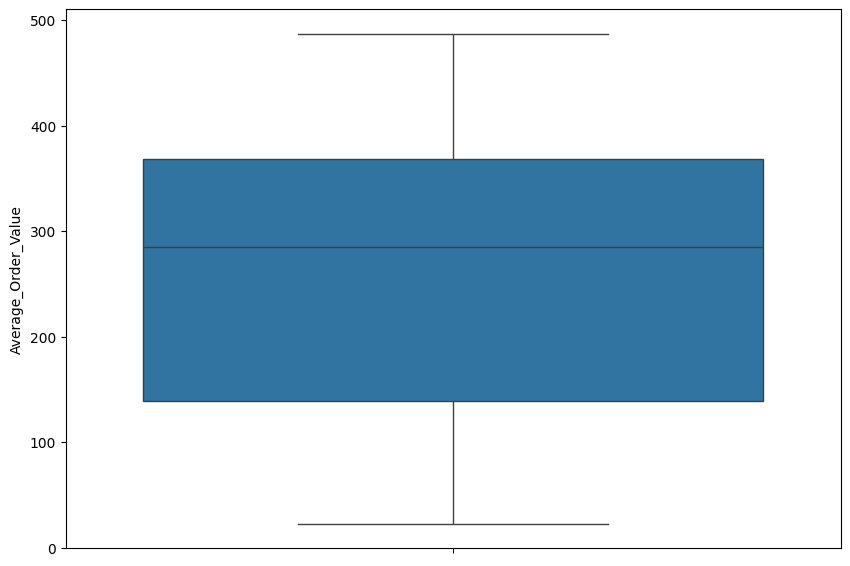

In [17]:
# Check whether there are any outliers
fig = plt.figure(figsize =(10, 7))
sns.boxplot(data= df['Average_Order_Value'])

In [20]:
# Replace missing values with mean of average_order_value
df['Average_Order_Value'].fillna(df['Average_Order_Value'].mean(), inplace= True)

/tmp/ipython-input-1305232004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average_Order_Value'].fillna(df['Average_Order_Value'].mean(), inplace= True)


In [21]:
# Missing Value Status
df.isna().sum()

,0
Customer_ID,0
Customer_Age,0
Total_Purchases,0
Average_Order_Value,0
Customer_Lifespan_Years,0
Marketing_Spend,0
Revenue_Generated,0
Churned,0
NPS_Score,0


# Calculating Marketing Metrics

In [22]:
# Calculate CLV

df["CLV"] = df["Average_Order_Value"] * df["Total_Purchases"] * df["Customer_Lifespan_Years"]


In [23]:
# top 5 customers with highest clv

sorted_columns = df[['Customer_ID', 'CLV']].sort_values(by='CLV', ascending=False)
sorted_columns.head()


,Customer_ID,CLV
92,CUST0093,56182.905
18,CUST0019,54852.784
32,CUST0033,53178.720
85,CUST0086,51447.695
98,CUST0099,47421.245


In [24]:
# Return on Marketing Investments

df['ROMI'] = ((df['Revenue_Generated'] - df['Marketing_Spend']) / df['Marketing_Spend']) * 100

In [25]:
# 5 Lowest ROMI
sorted_columns = df[['Customer_ID', 'ROMI']].sort_values(by='ROMI', ascending=True)
sorted_columns.head()

,Customer_ID,ROMI
54,CUST0055,-78.257770
55,CUST0056,-77.659755
97,CUST0098,-77.609320
16,CUST0017,-77.091586
86,CUST0087,-72.474829


In [29]:
# Total Counts of negative values
total_counts = df['ROMI'] < 0
negative_romi= total_counts.value_counts()

print("The total count of negative ROMI customers are: ", negative_romi.get(True))

The total count of negative ROMI customers are:  20


In [30]:
# Net Promotor Score -> Promoters, Detractors and Passives

# Count Promoters (NPS_Score >= 9)
promoters_count = df[df['NPS_Score'] >= 9].shape[0]
print(f"The Count of Promoters are: {promoters_count}")

# Count Passives (NPS_Score >= 7 and NPS_Score <= 8)
passives_count = df[(df['NPS_Score'] >= 7) & (df['NPS_Score'] <= 8)].shape[0]
print(f"The count of Passives are: {passives_count}")

# Count Detractors
detractors_count= df[(df['NPS_Score'] <=6) & (df['NPS_Score'] >= 0)].shape[0]
print(f"The count of Detractors are: {detractors_count}")

The Count of Promoters are: 14
The count of Passives are: 19
The count of Detractors are: 67


In [31]:
# NPS
nps = (14-67)/100
print(nps)

-0.53


In [32]:
# Customer lost
customers_churned = df[df['Churned'] == 1].shape[0]
print(f"The Count of Customers Churned are: {customers_churned}")

The Count of Customers Churned are: 11


In [33]:
# Customer Churn Rate
CCR = (11/100) *100
print(CCR)

11.0
